#  **Project Title: Predicting Track Genre Using Audio Features**

# Business Question:
Can we predict the genre of a track based solely on its audio features?

# Project Objective:
The goal of this project is to develop a machine learning model that classifies Spotify tracks into specific genres using audio features such as danceability, energy, acousticness, tempo, and more.

 By successfully building this model, we aim to help music platforms, producers, or listeners better categorize music and recommend tracks based on similar genres.

# Approach:
Exploratory Data Analysis (EDA): We will analyze the dataset to understand feature distributions, relationships between features, and any data cleaning that might be required.

Feature Selection and Engineering: Select the most relevant features (like tempo, valence, and danceability) and prepare the dataset for training.

Model Building: We will test multiple classification algorithms, such as Decision Trees, Random Forests, and Logistic Regression, to predict the genre of the track.

Model Evaluation: Evaluate model performance using accuracy, precision, recall, and other relevant metrics.

# **Team members**

# Ortal Lasry

# Or Cohen Raviv

## **Table of contents**

1. Introduction
2. Exploratory Data Analysis (EDA)

____2.1 Data Loading and Initial Inspection

____2.2 Data Cleaning

____2.3 Visualization Before and After Cleaning

____2.4 Correlation Analysis

____2.5 Detailed Analysis on Popularity, Tempo, and Valence

____2.6 Summary and Conclusions after EDA

3. Feature Selection and Engineering
4. Model Building
5. Model Evaluation

# 1.  **Introduction**


**Data set** used for analysis was found on Kaggle -
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

# **Spotify Tracks Dataset Description:**

This dataset contains information on Spotify tracks spanning 125 different genres. Each track is described by various audio features and metadata. The dataset can be utilized for:

Building recommendation systems based on user preferences or inputs.
Classification tasks based on audio features and genre categorization.

# **Columns Description:**

**track_id:** The unique Spotify ID for each track.

**artists:** Names of the artists who performed the track, separated by ';'.

**album_name:** The name of the album in which the track appears.

**track_name:** The title of the track.

**popularity:** A value between 0 and 100, indicating the track's popularity based on recent plays.

**duration_ms:** The length of the track in milliseconds.

**explicit:** Boolean indicating whether the track contains explicit content.

**danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

**energy:** Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

**key:** The musical key of the track mapped using standard Pitch Class notation.

**loudness:** Overall loudness of the track in decibels (dB).

**mode:** Indicates the modality (major or minor) of the track.

**speechiness:** Detects the presence of spoken words in the track.

**acousticness:** Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

**instrumentalness:** Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

**liveness:** Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

**valence:** Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

**tempo:** Estimated tempo of the track in beats per minute (BPM).

**time_signature:** Estimated time signature of the track (3 to 7).

Each track is associated with a specific genre labeled under **track_genre**.




# 2. **Exploratory Data Analysis (EDA)**


# 2.1 **Data Loading and Initial Inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import regex as re
import seaborn as sns

#seaborn was used for the corr plot in the correlation section.
#regex was used for unicode - all languages notes



df = pd.read_csv("dataset.csv", encoding='ISO-8859-1')


# Display the first few rows of the original dataset
print("First few rows of the original dataset:")
df.head()


First few rows of the original dataset:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:

# Data types in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [3]:

print("~"*100)
# Check for Missing Values
print("\nMissing values in the dataset:")
print(df.isna().sum())
print("According to the info() we see there is 1 missing value in columns: artists, album_name, track_name. This needs to be handled before carrying on.")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Missing values in the dataset:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
According to the info() we see there is 1 missing value in columns: artists, album_name, track_name. This needs to be handled before carrying on.


In [4]:

print("~"*100)
print("Introducing the boundaries for each relevant column:")
print("danceability  boundaries:")
print(df['danceability'].max(),"- between 0-1")
print(df['danceability'].min(), "- between 0-1")
print(df['popularity'].max(), "- high, popular")
print(df['popularity'].min()," - low, not popular")
print("tempo boundaries:")

print(df['tempo'].max(),"- high, fast bit")
print(df['tempo'].min()," - low, slow bit")
print("valence boundaries:")
print(df['valence'].max()," - high, positive effect")
print(df['valence'].min()," - low, negative effect")

print(df['speechiness'].max(), "- between 0-1")
print(df['speechiness'].min(), "- between 0-1")
print(df['loudness'].max(), "- decibels between -50 +5 (db can be minus)")
print(df['loudness'].min(), "- decibels  between-50 +5 (db can be minus)")




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Introducing the boundaries for each relevant column:
danceability  boundaries:
0.985 - between 0-1
0.0 - between 0-1
100 - high, popular
0  - low, not popular
tempo boundaries:
243.372 - high, fast bit
0.0  - low, slow bit
valence boundaries:
0.995  - high, positive effect
0.0  - low, negative effect
0.965 - between 0-1
0.0 - between 0-1
4.532 - decibels between -50 +5 (db can be minus)
-49.531 - decibels  between-50 +5 (db can be minus)


In [5]:
df['explicit'].value_counts()#Less then 10% of the df has explicit=TRUE(bad word)

explicit
False    104253
True       9747
Name: count, dtype: int64

In [69]:
# Check if the 'explicit' column contains any non-boolean values
non_bool_values = ~df['explicit'].isin([True, False])

# Display rows with non-boolean values in 'explicit' column
df[non_bool_values]
#There are 0 non-boolean values in explicit

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [6]:

df['explicit'] = df['explicit'].map({True: 1, False: 0})

df['explicit'].unique()




array([0, 1], dtype=int64)

In [7]:
df['explicit'].value_counts()

explicit
0    104253
1      9747
Name: count, dtype: int64

In [8]:
# Convert the 'speechiness' column to numeric, setting non-numeric values to NaN
non_numeric_values = pd.to_numeric(df['speechiness'], errors='coerce')

# Check for rows where 'speechiness' contains non-numeric values
non_numeric_rows = df[non_numeric_values.isna()]

# Display rows with non-numeric values in 'speechiness' column
non_numeric_rows


#There are 0 non_numeric_rows in speechiness
df['speechiness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: speechiness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [9]:

# Convert the 'loudness' column to numeric, setting non-numeric values to NaN
non_numeric_values2 = pd.to_numeric(df['loudness'], errors='coerce')

# Check for rows where 'loudness' contains non-numeric values
non_numeric_rows2 = df[non_numeric_values2.isna()]

# Display rows with non-numeric values in 'loudness' column
print(non_numeric_rows2)
df['loudness'].info()


Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []
<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: loudness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [10]:


# Convert the 'popularity' column to numeric type because of NaN types recognized in this column
df['popularity'] = pd.to_numeric(df['popularity'])

# Sort the dataframe by popularity in descending order
df_sorted = df.sort_values('popularity', ascending=False)

print("This is the sorted dataframe by popularity (Unholy by Kim Petras is the most popular song):")
df_sorted.head(10)
print(df_sorted.head(10))

print("~"*100)
# Check for missing values in the 'popularity' column
print("Missing values in popularity column:", df['popularity'].isnull().sum())

print("there are no missing values, the column had an issue with sorting (the max=100 didn't show on the top of the head) so i used to_numeric in order to sort it correctly.")
print("i don't know exactly why it happened because it shows no missing values, meaning everything in the column was totally numeric to begin with.")


########
# Specify the column you are interested in
column_name = 'artists'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########
# Specify the column you are interested in
column_name = 'track_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########

def has_a(value):
    #raise Exception(value) #try activating this and see what happens
    if str(value).isalpha():
        return str(value)[0]
    return ""

df.apply(has_a, axis=0)#these are the columns in the dataset

df.apply(has_a, axis=1) #these are the rows in the index column. it is an organized column.


# Check for missing values by column
missing_values = df.isnull().sum()

# Print columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)



This is the sorted dataframe by popularity (Unholy by Kim Petras is the most popular song):
                     track_id                  artists  \
20001  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
81051  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
51664  2tTmW7RDtMQtBk7m2rYeSw         Bizarrap;Quevedo   
81210  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
89411  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
68303  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
88410  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
30003  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
20008  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
67356  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   

                                  album_name  \
20001              Unholy (feat. Kim Petras)   
81051              Unholy (feat. Kim Petras)   
51664  Quevedo: Bzrp Music Sessions, Vol. 52   
81210                        I'm Good (Blue)   
89411                        

Checking duplicates for track_id

In [11]:

# Check for duplicate values in the 'track_id' column
duplicates = df[df['track_id'].duplicated(keep=False)]

# Display rows where duplicates are found
duplicates

# 40900 DUPLICATES in track_id#######

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,0,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,0,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,0,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,0,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [12]:
# Check for duplicate values in the 'track_id' column
duplicates = df[df['track_id'].duplicated(keep=False)]

# Display rows where duplicates are found
duplicates

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,0,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,0,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,0,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,0,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [13]:
# Find unique track_id values that are duplicated
duplicated_track_ids = df['track_id'][df['track_id'].duplicated()].unique()
print(duplicated_track_ids)


['0CDucx9lKxuCZplLXUz0iX' '2aibwv5hGXSgw7Yru8IYTO'
 '5E30LdtzQTGqRvNd7l6kG5' ... '71dLJx3qHOTQMTvvoE2dmd'
 '6OG5TBCmuTOuWCzSGsETrE' '7xsirhcgFWOnItsGuBfrv9']


In [14]:
# Get the count of all track_ids
track_id_counts = df['track_id'].value_counts()

# Filter out track_ids that appear more than once (i.e., duplicates)
duplicated_track_id_summary = track_id_counts[track_id_counts > 1]

# Display the count of duplicated track_ids
print(duplicated_track_id_summary)



track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
2a05MFdR1vtm8QVKFs1SGn    2
2BJdsyqP0IfOt0GR2a6zJl    2
7oyFihJppZYPP7o0NfoHnZ    2
0oz7Ia8lnWttkXi2TBc1Rd    2
1cbCEtcGU25HvwMrZDPqJy    2
Name: count, Length: 16641, dtype: int64


In [15]:
# Drop duplicate rows based on the 'track_id' column, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['track_id'], keep='first')

# Check the shape of the cleaned DataFrame to see how many rows remain
print(df_cleaned.shape)
#(89741, 7) rows*colums

(89741, 20)


In [16]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [17]:

#########

column_name = 'album_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

#print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)
########
print("The missing indices will be removed during the cleanup section.")

# Convert the 'tempo' column to numeric type
df['tempo'] = pd.to_numeric(df['tempo'])

# Convert the 'valence' column to numeric type
df['valence'] = pd.to_numeric(df['valence'])





[65900]
The missing indices will be removed during the cleanup section.


# 2.2 **Data Cleaning**

First few rows of the cleaned dataset:
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   
3  Can't Help Falling In Love    

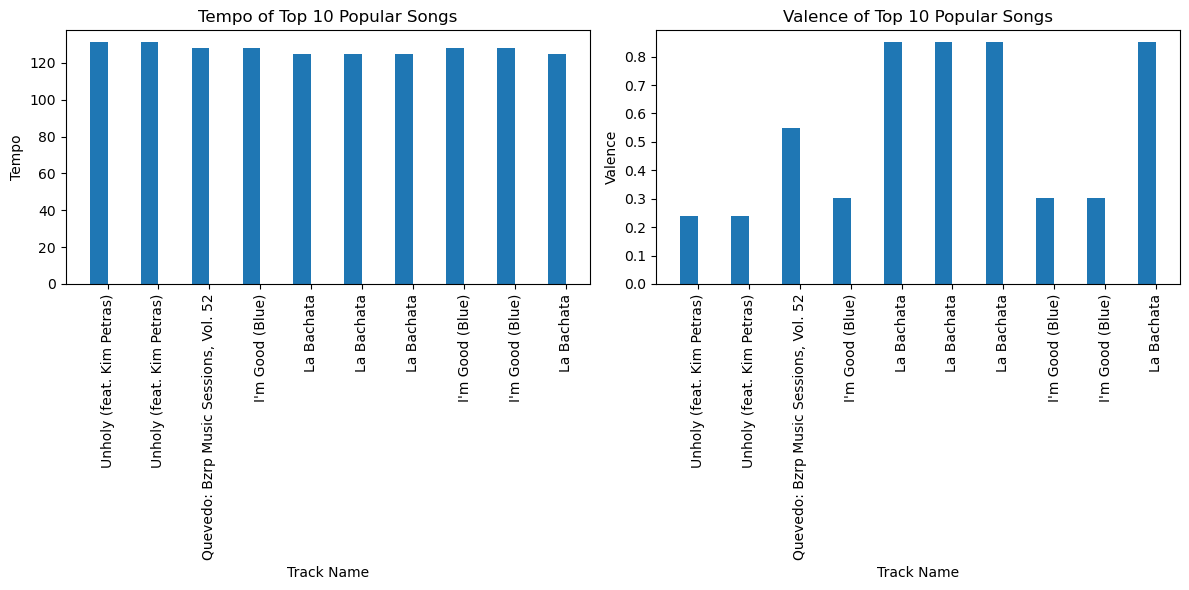

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
this wasn't good enough because you can see there are duplicate songs. so the next step is to agregate these duplicates and again visualize the top 10 popular songs.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cleaned_dataset after cleanup of jibrish and missing indices:
    
                      track_id                            artists  \
0       5SuOikwiRyPMVoIQDJUgSV                        Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A                       Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b             Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx                       Kina Grannis   
4       5vjLSffimiIP

In [18]:
# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
print(df.head())

# Sort the dataframe by popularity in descending order
df_sorted = df.sort_values('popularity', ascending=False)

####creating bar charts of 10 popular songs by tempo and by valence#####

print("~"*200)
print("Here are 2 charts to visualize why cleanup must continue - there are duplicates of the same track_name:")

# Select the top 10 tracks
top_10_tracks = df_sorted.head(10)

# Adjust bar width and add offset
bar_width = 0.35
offset = np.arange(len(top_10_tracks))

# Create separate charts for tempo and valence with adjusted bar width and offset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(offset, top_10_tracks['tempo'], bar_width, label='Tempo')
plt.xlabel('Track Name')
plt.ylabel('Tempo')
plt.title('Tempo of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.subplot(1, 2, 2)
plt.bar(offset, top_10_tracks['valence'], bar_width, label='Valence')
plt.xlabel('Track Name')
plt.ylabel('Valence')
plt.title('Valence of Top 10 Popular Songs')
plt.xticks(offset + bar_width / 2, top_10_tracks['track_name'], rotation=90)

plt.tight_layout()
plt.show()

print("~"*200)
print("this wasn't good enough because you can see there are duplicate songs. so the next step is to agregate these duplicates and again visualize the top 10 popular songs.")
print("~"*200)

#####cleanup of jibrish and missing indices album_name column######

# Remove rows with missing data
df_cleaned = df.dropna()

# Specify the column you are interested in
column_name = 'album_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'album_name' contains only numbers
numeric_rows = df[df['album_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'album_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['album_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)



#####cleanup of jibrish and missing indices for artists column######


# Specify the column you are interested in
column_name = 'artists'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'artists' contains only numbers
numeric_rows = df[df['artists'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'artists' contains at least one alphabetic character from any language
alphabetic_rows = df[df['artists'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Remove rows with missing data
df_cleaned = df.dropna()

#####cleanup of jibrish and missing indices for track_name column######

# Specify the column you are interested in
column_name = 'track_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'track_name' contains only numbers
numeric_rows = df[df['track_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'track_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['track_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


###### Verify the changes######
print("Cleaned_dataset after cleanup of jibrish and missing indices:")
print("    ")
print(df_cleaned)

print("~"*200)
print("Proving the missing indices have been removed:")
single_row = df_cleaned.loc[65899:65901, :]
print(type(single_row))
print(single_row)

print("~"*200)
print("The first cleanup of the dataframe:")
print(df_cleaned.info())

#######comparing between the original dataset and the first cleaned dataset########

df_original_dataset = pd.read_csv('dataset.csv', encoding='ISO-8859-1')

# Compare the shape of the datasets
print("comparing between the data shapes before and after cleanup:")
print("Original dataset shape:", df_original_dataset.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

print("~"*200)

# Check the distribution of a key feature (e.g., track_genre)

original_genre_distribution = df_original_dataset['track_genre'].value_counts(normalize=True)
cleaned_genre_distribution = df_cleaned['track_genre'].value_counts(normalize=True)

print("~"*200)
print("Original genre distribution:")
print(original_genre_distribution)

print("Cleaned genre distribution:")
print(cleaned_genre_distribution)

# Compare the mean popularity before and after cleaning

original_mean_popularity = df_original_dataset['popularity'].mean()
cleaned_mean_popularity = df_cleaned['popularity'].mean()

print("~"*200)
print("comparing between the mean popularity before and after cleanup:")
print("Original mean popularity:", original_mean_popularity)
print("Cleaned mean popularity:", cleaned_mean_popularity)

print("~"*200)
print("You can see there is no big change in mean popularity before and after cleanup, meaning the cleanup didn't impact the data.")

######filtering the data from unwanted duplicates######

# Group by 'track_name'
grouped = df_cleaned.groupby('track_name')

# Filter groups where all entries have the same 'artists' string
filtered_groups = grouped.filter(lambda x: len(x['artists'].unique()) == 1)

df = pd.read_csv("dataset.csv",encoding='ISO-8859-1')
print(df['duration_ms'])

# Convert the 'duration_ms' column to numeric type
df['duration_ms'] = pd.to_numeric(df['duration_ms'])

# Perform aggregation: mean popularity and mean duration
aggregated = filtered_groups.groupby('track_name').agg({
    'popularity': 'mean',
    'duration_ms': 'mean'
}).reset_index()

# Count the number of songs including duplicate songs with same relevant data after agregation of groupby
#This also equals the length of rows in cleaned_dataset.csv
same_name_count = df_cleaned['track_name'].value_counts()

# Count the number of songs with the same name and same artists
same_name_artist_count = df_cleaned.groupby(['track_name', 'artists']).size().reset_index(name='count')

# Save the aggregated DataFrame to a new CSV file
aggregated.to_csv('aggregated_dataset.csv', index=False)
print("~"*100)
print("This is the full aggregated data")
print(aggregated)
print("~"*100)
# Display the results
print("Number of songs with the same name:")
print(same_name_count[same_name_count > 1])  # Show only duplicates
print("~"*100)
print("\nNumber of songs with the same name and same artists:")
print(same_name_artist_count[same_name_artist_count['count'] > 1])  # Show only duplicates

#### Choose a track name (to demonstarte how duplicates of one track_name look like)
track_name_to_check = "La Bachata"
print("~"*100)
# Data before filtering and aggregation
original_data = df_cleaned[df_cleaned['track_name'] == track_name_to_check]
print("Original cleaned Data for a specific song - for demonstration of duplicates before filtering it:")
print(original_data)
print("~"*100)
# Data after filtering and aggregation
aggregated_data = aggregated[aggregated['track_name'] == track_name_to_check]
print("\nAggregated Data of the specific song selected for demonstraion after filtering duplicates:")
print(aggregated_data)

# Function to check for differences in specified columns
def check_differences(group, columns):
    for column in columns:
        if group[column].nunique() > 1:
            return True
    return False

# Columns to check for differences
columns_to_check = [ 'tempo', 'valence', 'popularity']

# Group by 'track_name' and check for differences
same_name_diff = df_cleaned.groupby('track_name').filter(lambda x: check_differences(x, columns_to_check))

# Group by 'track_name' and 'artists' and check for differences
same_name_artist_diff = df_cleaned.groupby(['track_name', 'artists']).filter(lambda x: check_differences(x, columns_to_check))
print("~"*100)
# Display results
print("Songs with the same name that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())
print("~"*100)
print("\nSongs with the same name and same artists that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_artist_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())

# Function to check if all rows have the same values for the specified columns
def check_all_same(group, columns):
    return group[columns].nunique().eq(1).all()

# Columns to check for equality
columns_to_check = ['tempo', 'valence', 'popularity']

# Identify rows to keep (for songs with same name and same artists with different values)
#This are rows with same track_name, meaning duplicates, but with different data, making them unique duplicates.
rows_to_keep = df_cleaned.groupby(['track_name', 'artists']).filter(
    lambda x: not check_all_same(x, columns_to_check)
)
print("~"*100)
# Display the resulting DataFrame
print("rows to keep and add to the cleaned dataset, to create final cleaned csv file:")
print(rows_to_keep)

# Save the resulting DataFrame to a new CSV file
rows_to_keep.to_csv('rows_to_keep_dataset.csv', index=False)

df_cleaned = df_cleaned.groupby('track_name').agg('first').reset_index()
print("~"*100)
# Display the resulting DataFrame
print("Cleaned_dataset after full agregation of duplicates (before filtering them):")
print(df_cleaned)

# Save again the cleaned dataset and now also filtered (after agregation by same track_name)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("~"*100)
print("Cleaned_dataset after full agregation of duplicates (afterrr filtering them):")
print(df_cleaned)
print("~"*100)

# Get unique track names in rows_to_keep
unique_track_names = rows_to_keep['track_name'].unique()

# Remove all rows with these track names from the original dataset
cleaned_df = df_cleaned[~df_cleaned['track_name'].isin(unique_track_names)]

# Append rows_to_keep to cleaned_df
final_df = pd.concat([cleaned_df, rows_to_keep])
print("~"*100)
# Display the final DataFrame
print("final cleaned dataset:")
print(final_df)

# Save the final DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset.csv', index=False)

**These are the columns I want to drop from the DF**

In [19]:

columns_to_remove = ['artists', 'album_name', 'track_name', 'popularity', 'mode', 
                     'liveness', 'time_signature', 'valence', 'key']
# Remove the columns
final_df = final_df.drop(columns_to_remove, axis=1)
final_df.head()

,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre
0,0fROT4kK5oTm8xO8PX6EJF,178533.0,1.0,0.823,0.6120,-7.767,0.2480,0.168,0.00000,142.959,french
1,1hH0t381PIXmUVWyG1Vj3p,151680.0,0.0,0.615,0.3750,-10.362,0.0319,0.482,0.00000,110.720,rockabilly
2,1B45DvGMoFWdbAEUH2qliG,84305.0,0.0,0.553,0.8120,-5.542,0.0558,0.132,0.00001,118.368,kids
3,73lXf5if6MWVWnsgXhK8bd,86675.0,0.0,0.664,0.6110,-8.687,0.0886,0.120,0.00000,118.443,kids
4,0jmz4aHEIBCRgrcV2xEkwB,289133.0,0.0,0.111,0.0568,-28.053,0.0551,0.990,0.69700,169.401,sleep


**Keeping only the following features: track_id,	explicit,	danceability,	energy,	speechiness,	tempo**
	
**This is the label: track_genre**

In [20]:
# Check for duplicate rows across all columns in final_df
duplicates_all_columns = final_df[final_df.duplicated(keep=False)]

# Display the duplicate rows
print("Duplicate rows across all columns:")
print(duplicates_all_columns)

# Count the number of duplicate rows
num_duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
#No duplicates in the final_df####

Duplicate rows across all columns:
Empty DataFrame
Columns: [track_id, duration_ms, explicit, danceability, energy, loudness, speechiness, acousticness, instrumentalness, tempo, track_genre]
Index: []
Number of duplicate rows: 0


In [21]:
print(final_df['track_genre'].unique())


['french' 'rockabilly' 'kids' 'sleep' 'power-pop' 'anime' 'romance'
 'piano' 'german' 'classical' 'show-tunes' 'british' 'ska' 'acoustic'
 'idm' 'hardstyle' 'electronic' 'emo' 'alternative' 'latin' 'punk-rock'
 'j-idol' 'trip-hop' 'country' 'club' 'comedy' 'detroit-techno' 'chill'
 'happy' 'folk' 'honky-tonk' 'opera' 'guitar' 'goth' 'disney' 'new-age'
 'bluegrass' 'mandopop' 'rock' 'rock-n-roll' 'blues' 'death-metal' 'jazz'
 'synth-pop' 'reggae' 'disco' 'industrial' 'garage' 'dub' 'grindcore'
 'dancehall' 'funk' 'j-pop' 'spanish' 'iranian' 'metalcore' 'alt-rock'
 'hip-hop' 'soul' 'k-pop' 'techno' 'house' 'black-metal' 'chicago-house'
 'trance' 'psych-rock' 'pagode' 'j-dance' 'study' 'brazil' 'world-music'
 'hardcore' 'children' 'ambient' 'gospel' 'sertanejo' 'punk' 'party'
 'groove' 'forro' 'afrobeat' 'turkish' 'heavy-metal' 'edm' 'indie'
 'latino' 'hard-rock' 'singer-songwriter' 'cantopop' 'drum-and-bass'
 'minimal-techno' 'indie-pop' 'grunge' 'electro' 'swedish' 'metal'
 'breakbeat' 

In [22]:
# Define genres for each group
electronic_genres=['electronic', 'idm', 'hardstyle', 'detroit-techno', 'chill', 'club', 'trance', 'deep-house', 'minimal-techno', 'dubstep', 'techno', 'progressive-house', 'house',
    'garage', 'disco', 'dance', 'chicago-house', 'edm', 'dancehall', 'drum-and-bass', 'breakbeat', 'trip-hop','j-dance', 'ambient', 'electro']

pop_genres=['pop', 'power-pop', 'synth-pop', 'indie-pop', 'singer-songwriter', 'j-pop', 'k-pop', 'cantopop', 'pop-film','j-idol']

rock_genres = ['rock', 'rock-n-roll', 'alt-rock', 'alternative', 'hard-rock', 'metal', 'heavy-metal', 'black-metal', 'death-metal', 'metalcore',
      'grunge', 'emo', 'psych-rock', 'hardcore', 'goth', 'industrial', 'punk', 'punk-rock', 'grindcore', 'j-rock','indie']

hiphop_genres = ['hip-hop', 'r-n-b', 'rap', 'soul']

world_genres = ['latin', 'latino', 'reggae', 'salsa', 'samba', 'brazil', 'forro', 'afrobeat', 'pagode', 'tango', 'french', 'german', 'british', 'iranian', 'indian', 'turkish', 'world-music', 'mandopop', 'mpb', 'malay', 'spanish','swedish']
                
Classical_Instrumental=['classical', 'piano', 'guitar']

jazz_blues_genres = ['jazz', 'blues', 'funk', 'groove', 'soul','acoustic', 'gospel']

Country_Folk=['country', 'folk', 'honky-tonk', 'bluegrass','rockabilly', 'sertanejo']

Specialty_Other= ['anime', 'show-tunes', 'opera', 'comedy', 'disney', 'new-age', 'children', 'study', 'happy', 'sleep', 'kids', 'romance', 'sad', 'songwriter', 'party']

Reggae_Afrobeat=['reggae', 'dub', 'afrobeat', 'ska','reggaeton']



In [23]:

# Create an empty mapping dictionary
genre_to_group = {}

# Assign genres to their corresponding groups
genre_to_group.update({genre: 'Electronic' for genre in electronic_genres})
genre_to_group.update({genre: 'Pop' for genre in pop_genres})
genre_to_group.update({genre: 'Rock' for genre in rock_genres})
genre_to_group.update({genre: 'Hip-Hop' for genre in hiphop_genres})
genre_to_group.update({genre: 'World' for genre in world_genres})
genre_to_group.update({genre: 'Classical/Instrumental' for genre in Classical_Instrumental})


genre_to_group.update({genre: 'Jazz/Blues' for genre in jazz_blues_genres})
genre_to_group.update({genre: 'Folk/Country' for genre in Country_Folk})
genre_to_group.update({genre: 'Specialty' for genre in Specialty_Other})

genre_to_group.update({genre: 'Reggae/Afrobeat' for genre in Reggae_Afrobeat})

# Now, use this final mapping dictionary to map genres in your dataframe
final_df['genre_group'] = final_df['track_genre'].map(genre_to_group)
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [24]:
final_df['genre_group'].nunique()

10

In [36]:
final_df['genre_group'].isna().sum()

0

In [37]:
final_df['genre_group'].isnull().sum()

0

In [38]:
print(final_df.index.duplicated().sum())


0


In [39]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87867 entries, 0 to 87866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          87867 non-null  object 
 1   duration_ms       87867 non-null  float64
 2   explicit          87867 non-null  float64
 3   danceability      87867 non-null  float64
 4   energy            87867 non-null  float64
 5   loudness          87867 non-null  float64
 6   speechiness       87867 non-null  float64
 7   acousticness      87867 non-null  float64
 8   instrumentalness  87867 non-null  float64
 9   tempo             87867 non-null  float64
 10  track_genre       87867 non-null  object 
 11  genre_group       87867 non-null  object 
dtypes: float64(9), object(3)
memory usage: 8.0+ MB


In [40]:
# Identify and display rows with duplicate index labels in the dataframe

# Find duplicated index values
duplicate_indices = final_df.index[final_df.index.duplicated()]
# Select rows that have duplicated index labels
duplicates_df = final_df.loc[duplicate_indices]
duplicates_df



,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre,genre_group


In [41]:
#i need to reset the index because i have duplicates in the index but nou in the values:
final_df = final_df.reset_index(drop=True)


In [42]:
duplicate_indices = final_df.index[final_df.index.duplicated()]
duplicate_indices 

Index([], dtype='int64')

In [32]:
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [46]:
# generate 'genre_class' to map genre_group  to  int64 type becuase it is object:

# Define the genres and corresponding class labels
genres_to_map = {
    'Electronic': 0, 
    'Pop': 1, 
    'Rock': 2, 
    'Hip-Hop': 3, 
    'World': 4, 
    'Classical/Instrumental': 5, 
    'Jazz/Blues': 6,
    'Folk/Country': 7, 
    'Specialty': 8,  # Keep only one 'Specialty'
    'Reggae/Afrobeat': 9  # Assign a unique label to Reggae/Afrobeat
}

# Map the genre_group to genre_class using the corrected mapping
final_df['genre_class'] = final_df['genre_group'].map(genres_to_map)


final_df['genre_class'].unique()



array([4, 7, 8, 1, 5, 9, 6, 0, 2, 3], dtype=int64)

In [47]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87867 entries, 0 to 87866
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          87867 non-null  object 
 1   duration_ms       87867 non-null  float64
 2   explicit          87867 non-null  float64
 3   danceability      87867 non-null  float64
 4   energy            87867 non-null  float64
 5   loudness          87867 non-null  float64
 6   speechiness       87867 non-null  float64
 7   acousticness      87867 non-null  float64
 8   instrumentalness  87867 non-null  float64
 9   tempo             87867 non-null  float64
 10  track_genre       87867 non-null  object 
 11  genre_group       87867 non-null  object 
 12  genre_class       87867 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 8.7+ MB


# 2.3. **Visualization After Cleaning**

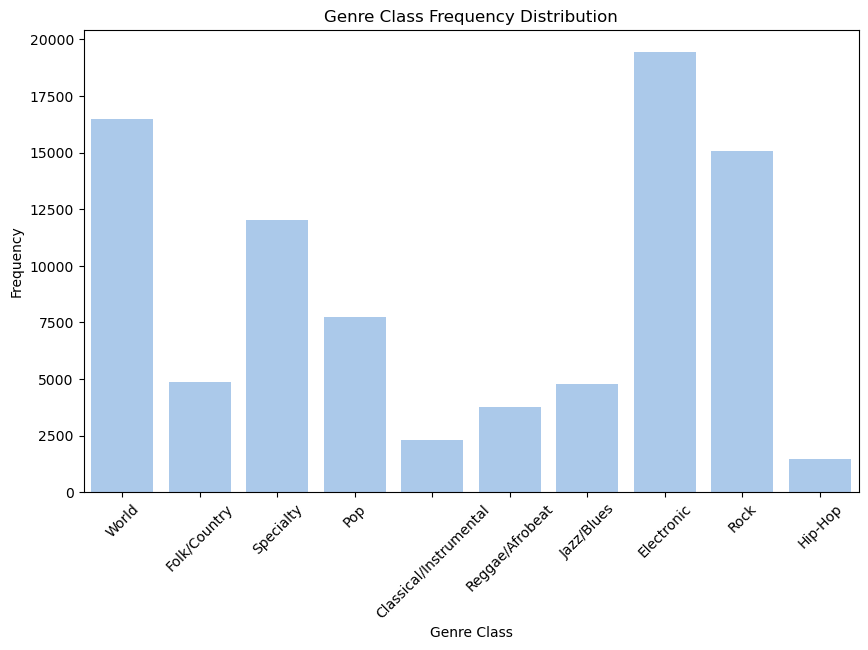

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel palette
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='genre_group', data=final_df, color=sns.color_palette("pastel")[0])


plt.xlabel('Genre Class')
plt.ylabel('Frequency')
plt.title('Genre Class Frequency Distribution')

plt.xticks(rotation=45)
# Show the plot
plt.show()


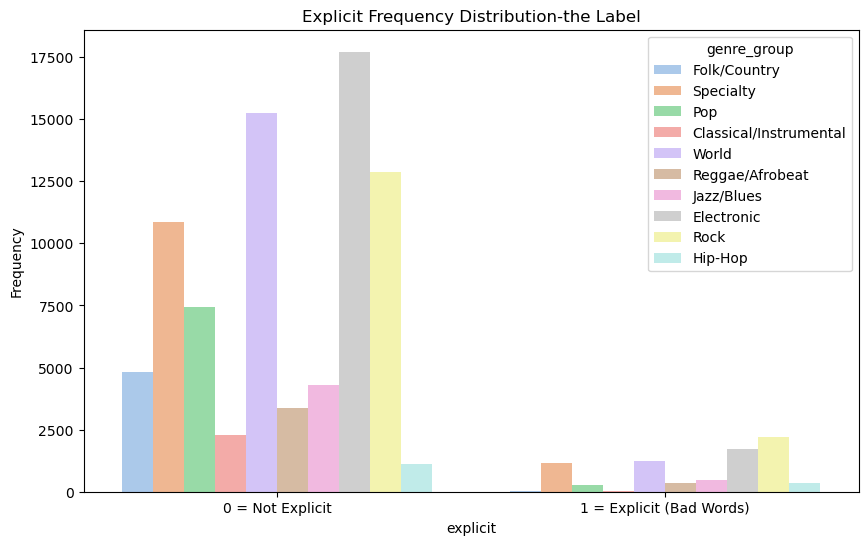

In [49]:
# Graph for explicit_cat by track_genre
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='explicit', hue='genre_group', data=final_df, palette="pastel")


plt.xlabel('explicit')
plt.ylabel('Frequency')
plt.title('Explicit Frequency Distribution-the Label')

plt.xticks([0, 1], ['0 = Not Explicit', '1 = Explicit (Bad Words)'])

plt.show()

# as expected hip hop and death metal have the highest frequncies of Explicit (bad words), while classic dont have at all.

In [50]:
#Summery table for all vars

pd.set_option('display.precision', 2) #show only 2 digit after zero
final_df.describe()

,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,genre_class
count,8.79e+04,87867.00,87867.00,87867.00,87867.00,87867.00,87867.00,8.79e+04,87867.00,87867.00
mean,2.29e+05,0.09,0.57,0.64,-8.31,0.09,0.32,1.63e-01,122.14,3.55
std,1.12e+05,0.28,0.18,0.25,5.11,0.11,0.33,3.16e-01,30.15,2.97
min,8.59e+03,0.00,0.00,0.00,-49.53,0.00,0.00,0.00e+00,0.00,0.00
25%,1.74e+05,0.00,0.45,0.47,-10.07,0.04,0.02,0.00e+00,99.05,1.00
50%,2.14e+05,0.00,0.58,0.69,-7.03,0.05,0.17,4.50e-05,122.02,4.00
75%,2.64e+05,0.00,0.70,0.86,-5.02,0.09,0.60,6.21e-02,140.10,6.00
max,5.24e+06,1.00,0.98,1.00,4.53,0.96,1.00,1.00e+00,243.37,9.00


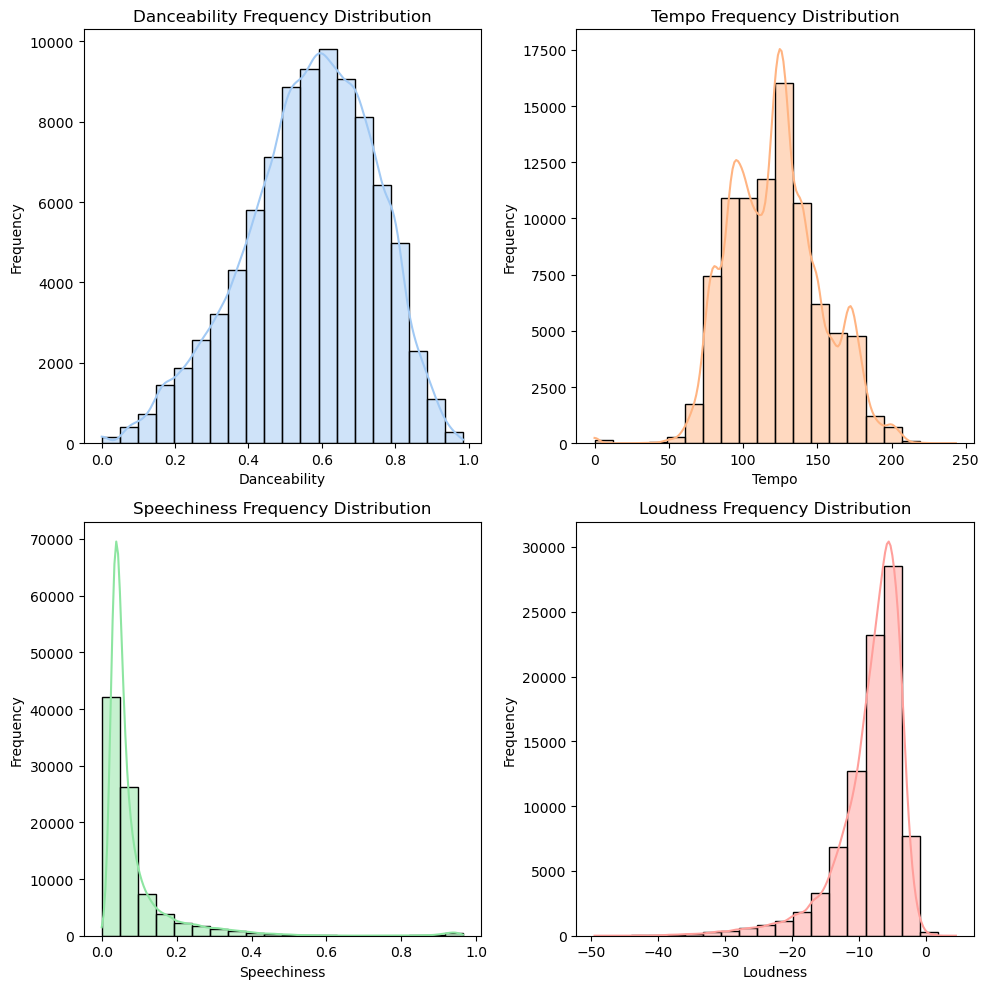

In [51]:
#What is the distribution of ALL FEATURES?

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns

# Histogram for danceability
sns.histplot(final_df['danceability'], kde=True, color=sns.color_palette("pastel")[0], bins=20, ax=axes[0, 0], line_kws={'color': 'black'})
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Danceability Frequency Distribution')

# Histogram for tempo
sns.histplot(final_df['tempo'], kde=True, color=sns.color_palette("pastel")[1], bins=20, ax=axes[0, 1], line_kws={'color': 'black'})
axes[0, 1].set_xlabel('Tempo')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Tempo Frequency Distribution')

# Histogram for speechiness
sns.histplot(final_df['speechiness'], kde=True, color=sns.color_palette("pastel")[2], bins=20, ax=axes[1, 0], line_kws={'color': 'black'})
axes[1, 0].set_xlabel('Speechiness')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Speechiness Frequency Distribution')

# Histogram for loudness
sns.histplot(final_df['loudness'], kde=True, color=sns.color_palette("pastel")[3], bins=20, ax=axes[1, 1], line_kws={'color': 'black'})
axes[1, 1].set_xlabel('Loudness')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Loudness Frequency Distribution')



plt.tight_layout()

plt.show()

#Danceability and tempo have relatively normal distributions. 
# While speechiness shows a long right-tailed distribution, and loudness has a long left-tailed distribution.
#This suggests that most tracks in our dataset have low levels of speechiness and high levels of loudness


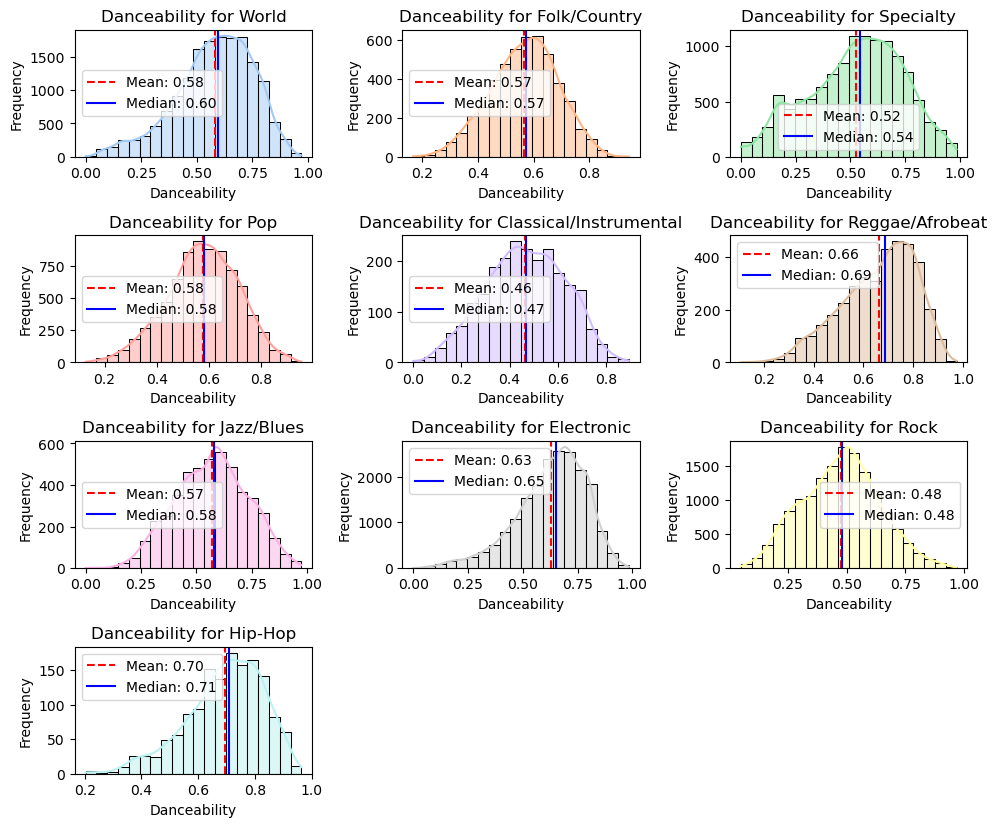

In [52]:
#what is the distribution of danceability by by track_genre?
#what is the mean and median values?
# Get unique genres
genres = final_df['genre_group'].unique()


num_genres = len(genres)
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  


axes = axes.flatten()

# Loop through each genre and plot the distribution of danceability for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for danceability
    sns.histplot(df_genre['danceability'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_danceability = df_genre['danceability'].mean()
    median_danceability = df_genre['danceability'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_danceability, color='red', linestyle='--', label=f'Mean: {mean_danceability:.2f}')
    axes[i].axvline(median_danceability, color='blue', linestyle='-', label=f'Median: {median_danceability:.2f}')

    # Set labels and title
    axes[i].set_xlabel('Danceability')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Danceability for {genre}')

    # Add legend
    axes[i].legend()

# Hide any empty subplots if genres are fewer than 6
for j in range(len(genres), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#It's not surprising that classical and death metal tracks tend to have lower danceability compared to other genres.

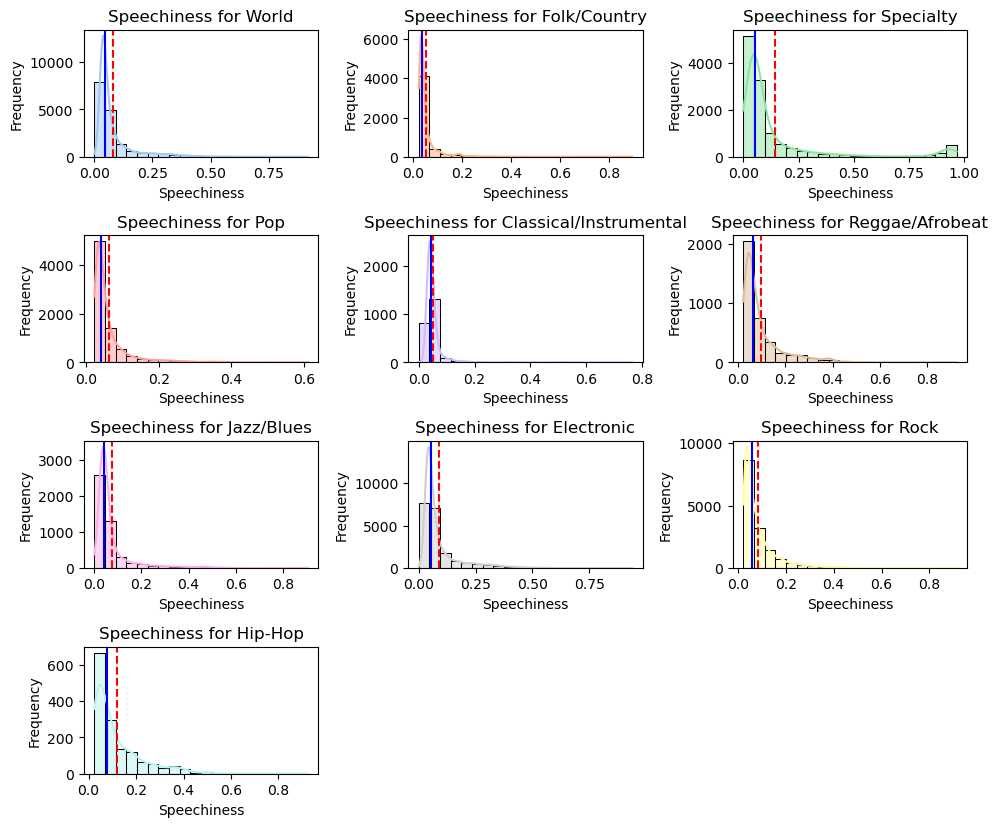

In [53]:
#what is the distribution of speechiness by track_genre?
#what is the mean and median values?


# Get unique genres
genres = final_df['genre_group'].unique()

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each genre and plot the distribution of speechiness for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for speechiness
    sns.histplot(df_genre['speechiness'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_speechiness = df_genre['speechiness'].mean()
    median_speechiness = df_genre['speechiness'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_speechiness, color='red', linestyle='--', label=f'Mean: {mean_speechiness:.2f}')
    axes[i].axvline(median_speechiness, color='blue', linestyle='-', label=f'Median: {median_speechiness:.2f}')

    # Set labels and title
    axes[i].set_xlabel('Speechiness')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Speechiness for {genre}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

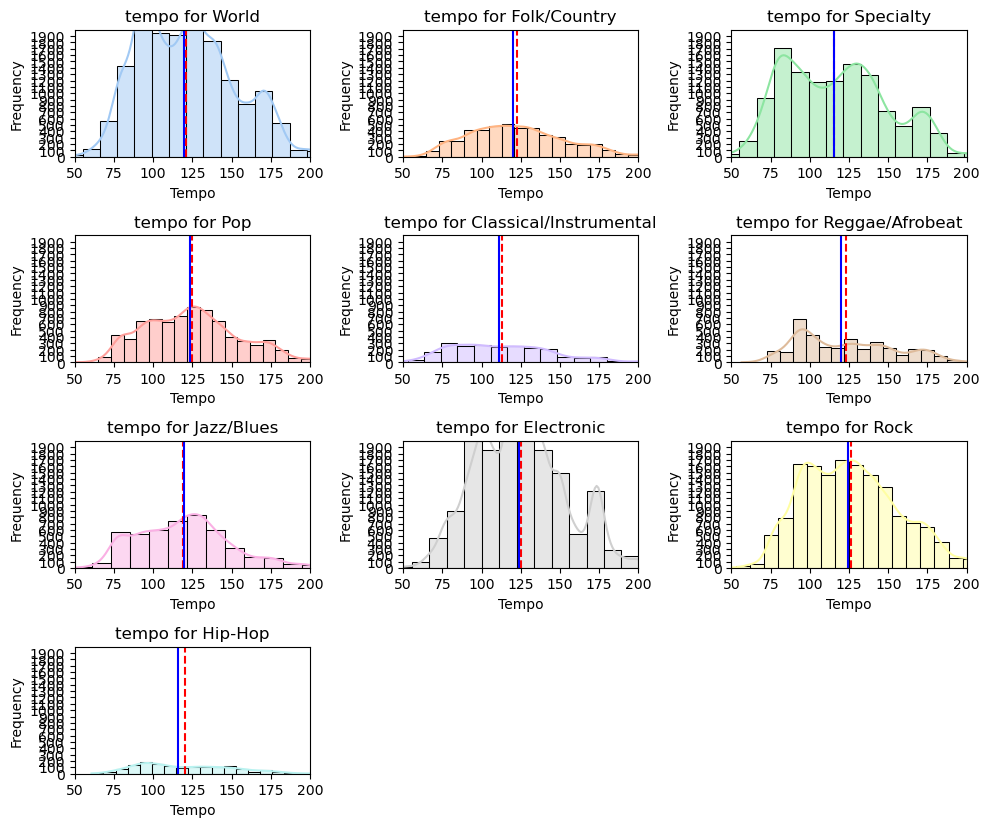

In [54]:
#what is the distribution of tempo by track_genre?
#what is the mean and median values?
genres = final_df['genre_group'].unique()

fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

axes = axes.flatten()

# Loop through each genre and plot the distribution of tempo for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for tempo
    sns.histplot(df_genre['tempo'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_tempo = df_genre['tempo'].mean()
    median_tempo = df_genre['tempo'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_tempo, color='red', linestyle='--', label=f'Mean: {mean_tempo:.2f}')
    axes[i].axvline(median_tempo, color='blue', linestyle='-', label=f'Median: {median_tempo:.2f}')


 # Set x-axis limits and ticks from 50-200, with steps of 25
    axes[i].set_xlim(50, 200)
    axes[i].set_xticks(range(50, 201, 25))

 # Set x-axis limits and ticks from 0-190, with steps of 25
    axes[i].set_ylim(0, 2000)
    axes[i].set_yticks(range(0, 2000, 100))

    axes[i].set_xlabel('Tempo')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'tempo for {genre}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

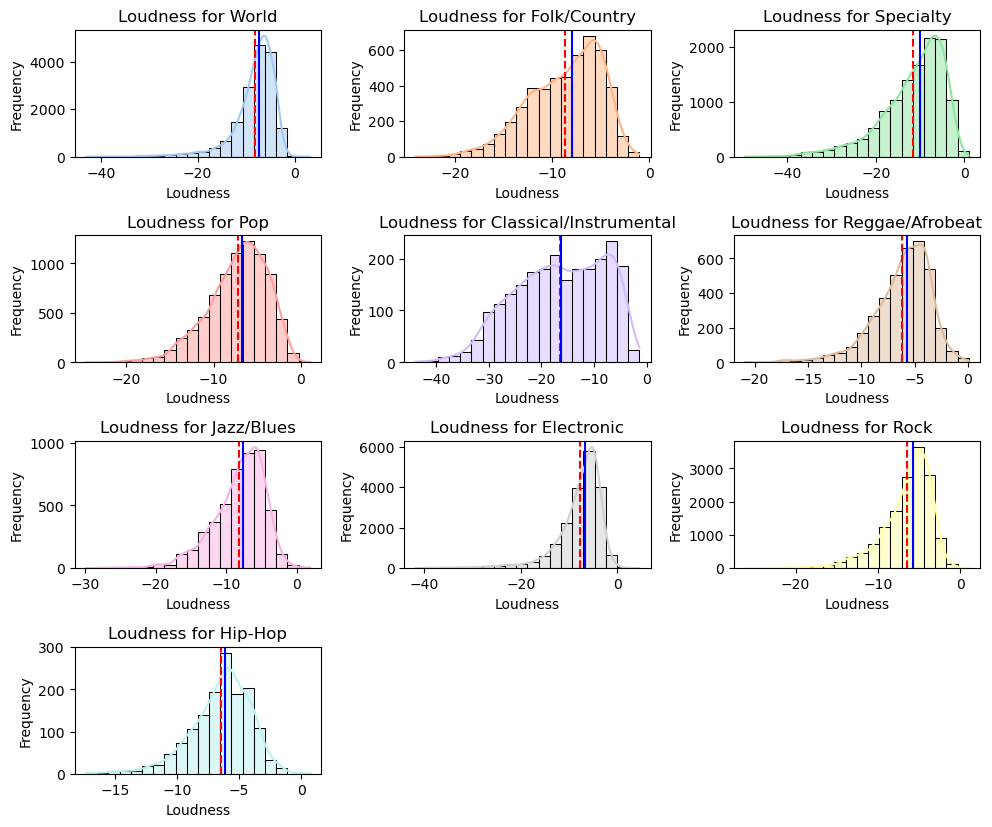

In [55]:
#what is the distribution of loudness by track_genre?
#what is the mean and median values?

genres = final_df['genre_group'].unique()

fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

axes = axes.flatten()

# Loop through each genre and plot the distribution of loudness for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for loudness
    sns.histplot(df_genre['loudness'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_loudness = df_genre['loudness'].mean()
    median_loudness = df_genre['loudness'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_loudness, color='red', linestyle='--', label=f'Mean: {mean_loudness:.2f}')
    axes[i].axvline(median_loudness, color='blue', linestyle='-', label=f'Median: {median_loudness:.2f}')


    axes[i].set_xlabel('Loudness')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Loudness for {genre}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()

plt.show()

# 2.4. **Correlation Analysis**

In [56]:
#What is the correlation between all quantitative features in the dataset?
columns = ['speechiness','danceability', 'loudness', 'tempo','acousticness','energy','instrumentalness','duration_ms']

correlation_matrix = final_df[columns].corr()

print(correlation_matrix)

#Danceability and loudness have a relatively strong correlation, while loudness and speechiness show a medium correlation. 
#Surprisingly, tempo and danceability have a very low correlation, which can be explained by the fact that classical tracks tend to have a high tempo and low danceability.


                  speechiness  danceability  loudness     tempo  acousticness  \
speechiness          1.00e+00          0.11  5.28e-02  3.12e-03          0.01   
danceability         1.07e-01          1.00  2.73e-01 -4.14e-02         -0.17   
loudness             5.28e-02          0.27  1.00e+00  2.19e-01         -0.58   
tempo                3.12e-03         -0.04  2.19e-01  1.00e+00         -0.21   
acousticness         1.50e-02         -0.17 -5.77e-01 -2.12e-01          1.00   
energy               1.37e-01          0.14  7.55e-01  2.49e-01         -0.72   
instrumentalness    -9.73e-02         -0.20 -4.36e-01 -5.17e-02          0.09   
duration_ms         -6.13e-02         -0.07 -1.78e-03  2.59e-02         -0.10   

                  energy  instrumentalness  duration_ms  
speechiness         0.14             -0.10    -6.13e-02  
danceability        0.14             -0.20    -6.65e-02  
loudness            0.75             -0.44    -1.78e-03  
tempo               0.25             -

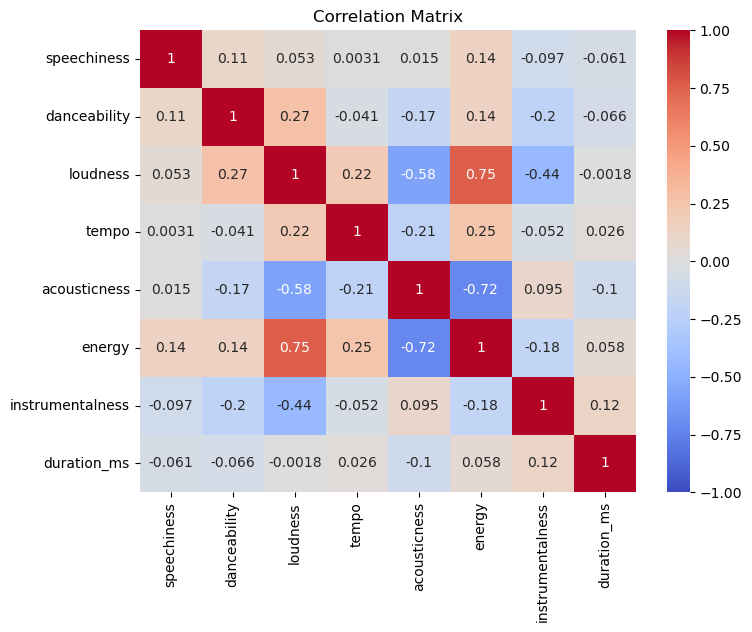

In [57]:
# Correlation plot: we did this beacuse we want to check the relationship between the features in the model and to prevent multicollinearity.
#We want to make sure that the features are not measuring the same attribute. 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#High correlations between: enrgy and loudness 
                        #enrgy and acousticness
# so i can drop energy from the model
# OR i CAN APPLY PCA DIMENSIONALITY REDUCTION


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with high correlation
features_to_reduce = ['energy', 'loudness', 'acousticness', 'instrumentalness']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df[features_to_reduce])

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components to retain
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components to the dataframe
final_df['PCA1'] = X_pca[:, 0]
final_df['PCA2'] = X_pca[:, 1]

# Check the explained variance to understand how much information is retained
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

#The goal of PCA is to find these new components, which are linear combinations of the original features, that explain the most variance in the data. 
# #The first principal component (PCA1) captures the largest possible variance, and the second principal component (PCA2) captures the largest variance remaining 
# #while being orthogonal (uncorrelated) to the first.

Explained Variance Ratios: [0.62210233 0.2468517 ]


# 2.6. **Summary and Conclusions after EDA**

# 3. **Feature Selection and Engineering**

In [60]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif  # Use f_classif as the scoring function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

#Building the piplines:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression


In [86]:

#STARTING WITH LOGISTIC REGRESSION

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler()),  # Standardize quantitative columns
    ]), quantitative_columns),
    
    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')



# Voting Classifier Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',clf1)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0],  # Regularization parameter for Logistic Regression
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)


# 4. **Model Building**

#4.1 **LOGISTIC REGRESSION**

In [87]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")




Test Accuracy: 0.28


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test,  # True labels
                      y_pred=y_pred_test)  # Predicted labels

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the voting classifier
                     columns=best_model.named_steps['classifier'].classes_)

cm_df



,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,415,7,94,16,50,32,11,35,14,16
Electronic,355,1889,241,673,188,280,1239,770,172,26
Folk/Country,86,24,677,58,162,152,92,132,27,45
Hip-Hop,0,6,48,178,38,20,89,23,14,22
Jazz/Blues,60,51,317,199,286,123,141,190,32,31
Pop,65,90,428,174,335,322,368,433,26,76
Reggae/Afrobeat,14,109,65,275,28,78,332,182,24,16
Rock,49,267,369,282,219,257,353,2630,58,44
Specialty,811,267,443,370,322,104,343,354,563,30
World,334,130,1155,765,539,489,567,546,213,202


In [98]:

from sklearn.metrics import confusion_matrix

# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the classifier
                     columns=best_model.named_steps['classifier'].classes_)

# Calculate the accuracy for each class
class_accuracies = {}
for i, class_label in enumerate(best_model.named_steps['classifier'].classes_):
    # Calculate the accuracy for the current class
    class_accuracy = cm[i, i] / cm[i, :].sum()
    class_accuracies[class_label] = class_accuracy

# Convert to a DataFrame for a nicer presentation and sort it in descending order
class_accuracies_df = pd.DataFrame(list(class_accuracies.items()), columns=['Genre Group', 'Accuracy'])
class_accuracies_df = class_accuracies_df.sort_values(by='Accuracy', ascending=False)

# Print the result
print("Accuracy for Each Genre Group (Descending Order):")
print(class_accuracies_df)


Accuracy for Each Genre Group (Descending Order):
              Genre Group  Accuracy
0  Classical/Instrumental      0.60
7                    Rock      0.58
2            Folk/Country      0.47
3                 Hip-Hop      0.41
1              Electronic      0.32
6         Reggae/Afrobeat      0.30
4              Jazz/Blues      0.20
8               Specialty      0.16
5                     Pop      0.14
9                   World      0.04


In [82]:
# Check class distribution in the target variable
print(y_train.value_counts(normalize=True))


genre_group
Electronic                0.22
World                     0.19
Rock                      0.17
Specialty                 0.14
Pop                       0.09
Folk/Country              0.06
Jazz/Blues                0.05
Reggae/Afrobeat           0.04
Classical/Instrumental    0.03
Hip-Hop                   0.02
Name: proportion, dtype: float64


**4.2 Voting classifier**

In [111]:

#Ensemble trees: First applying The Voting Classifier:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),
    
    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422,class_weight='balanced')


voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2)
], voting='soft')  # Use 'soft' to allow probability predictions


# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [10],  # Decision Tree 1
    'voting_clf__dt1__min_samples_split': [4],
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)





In [112]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.34


In [113]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['voting_clf'].classes_,  # Class labels from the classifier
                     columns=best_model.named_steps['voting_clf'].classes_)

# Calculate the accuracy for each class
class_accuracies = {}
for i, class_label in enumerate(best_model.named_steps['voting_clf'].classes_):
    # Calculate the accuracy for the current class
    class_accuracy = cm[i, i] / cm[i, :].sum()
    class_accuracies[class_label] = class_accuracy

# Convert to a DataFrame for a nicer presentation and sort it in descending order
class_accuracies_df = pd.DataFrame(list(class_accuracies.items()), columns=['Genre Group', 'Accuracy'])
class_accuracies_df = class_accuracies_df.sort_values(by='Accuracy', ascending=False)

# Print the result
print("Accuracy for Each Genre Group (Descending Order):")
print(class_accuracies_df)

Accuracy for Each Genre Group (Descending Order):
              Genre Group  Accuracy
7                    Rock      0.58
0  Classical/Instrumental      0.53
2            Folk/Country      0.45
3                 Hip-Hop      0.43
1              Electronic      0.37
6         Reggae/Afrobeat      0.37
8               Specialty      0.31
5                     Pop      0.28
4              Jazz/Blues      0.21
9                   World      0.09


In [115]:
# Using the ROC curve and AUC to see how the model preforms at different classification thresholds:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Voting Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Voting Classifier test ROC AUC: {roc_auc:.2f}")

Voting Classifier train ROC AUC: 0.81
Voting Classifier test ROC AUC: 0.78


In [ ]:
#######ORIGINAL-TAKES MORE THAN 100 MINUTES TO PROCESS####################
#Ensemble trees: First applying The Voting Classifier:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



################

##try adding Fit XGBOOST | LightGBM 



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),
    
    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422,class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
clf4 = SVC(probability=True, class_weight='balanced')  # Important to set probability=True for soft voting
clf_xgb = XGBClassifier() #This is an optimized version of gradient boosting-its a boosting techniqe to reduce the residual eroor od the training data

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2),
    ('rf', clf3),
    ('svc', clf4),
    ('xgb',clf_xgb)
], voting='soft')

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [10],  # Decision Tree 1
    'voting_clf__dt1__min_samples_split': [4],
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)





In [108]:
# Using the ROC curve and AUC to see how the model preforms at different classification thresholds:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Voting Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Voting Classifier test ROC AUC: {roc_auc:.2f}")


AttributeError: This 'Pipeline' has no attribute 'predict_proba'

#4.2 **Random Forest Classifier**

In [39]:
#RandomForest
# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','track_id'], axis=1)
y = final_df['genre_class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'tempo']

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)


# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),
    
    # Add non-quantitative columns seperatly because i cant run columnTransformer on explicit
    ('non_quant', 'passthrough', non_quantitiative)  # numeric feature (0, 1)
])

RandomForest_clf = RandomForestClassifier()
   
# RandomForest Classifier Pipeline
randomforestpipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('RandomForest_clf', RandomForest_clf)
])


# Define the parameter grid for RandomForestClassifier
param_grid = {
    'RandomForest_clf__n_estimators': [100],  # Use only one value for fewer iterations
    'RandomForest_clf__max_depth': [10],  # Try fewer max_depth options
    'RandomForest_clf__min_samples_split': [2],  # Consider the most reasonable values only
    'RandomForest_clf__min_samples_leaf': [1],
    'RandomForest_clf__criterion': ['gini'],  # Use only 'gini' or 'entropy', not both
    'RandomForest_clf__bootstrap': [True]  # Use just one option to reduce search space
}


# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(randomforestpipeline, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)




# 4. **Model evaluation**
**4.1 Feature importance**

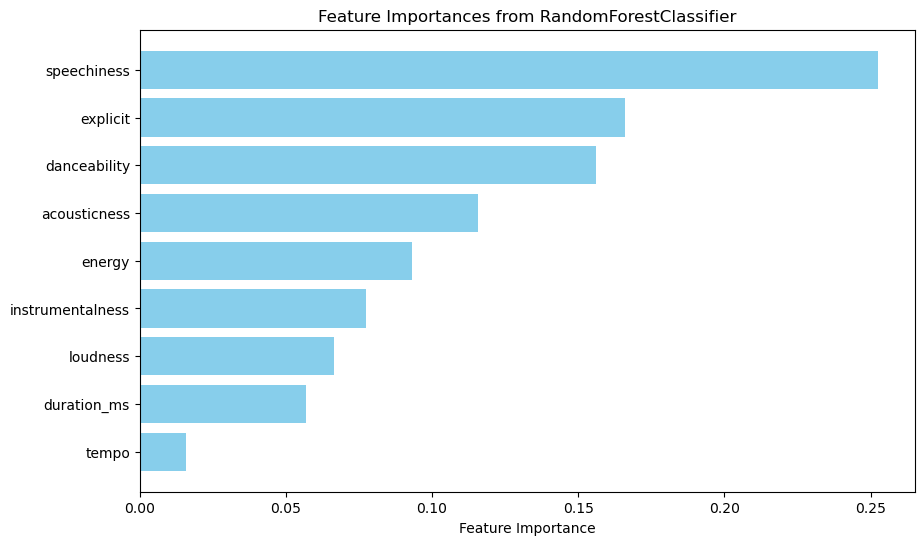

In [40]:

# Extract and display feature importances
feature_importances = best_model.named_steps['RandomForest_clf'].feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names

# Create a sorted list of features and their importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis for a better visualization
plt.show()
#if i am dropint tempo the model accuracy score is lower


**4.2 Different evaluation matrices**

In [41]:
# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test,  # True labels
                      y_pred=y_pred_test)  # Predicted labels

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['RandomForest_clf'].classes_,  # Class labels from the voting classifier
                     columns=best_model.named_steps['RandomForest_clf'].classes_)

# Display the confusion matrix DataFrame
print(cm_df)

# Accuracy score using the correct variables
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

     0    1    2    3    4
0  103    1   48    1    6
1    7  192    8   25    0
2   29    7  189    2    2
3    0   13    2  256    2
4   10    0    3    0  249
Test Accuracy: 0.86


In [42]:
from sklearn.metrics import f1_score
#evaluating the weighted F1 score on both the training and test sets:
#F score is a harmonic mean of precision and recall,

# Evaluate the F1 score on training and test sets
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Output F1 scores
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Output accuracy scores using the best_model from GridSearchCV
print(f"RandomForest Classifier Train accuracy: {best_model.score(X_train, y_train):.2f}")
print(f"RandomForest Classifier Test accuracy: {best_model.score(X_test, y_test):.2f}")


Train F1 Score: 0.96
Test F1 Score: 0.86
RandomForest Classifier Train accuracy: 0.96
RandomForest Classifier Test accuracy: 0.86


**4.3 ROC AUC**

In [43]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 1.00
Random Forest Classifier test ROC AUC: 0.98


In [44]:
#Suggested Groupings for Genres:#########

Electronic/Dance Music

EDM
Electro
Trance
Techno
Progressive House
Deep House
Dubstep
Garage
House
Dancehall
Drum and Bass
Minimal Techno
Chill
Ambient
Dance
Club

Group Name: Electronic

Pop Music:

Pop
K-Pop
Indie Pop
Synth-Pop
Singer-Songwriter
Britpop
Power Pop
Group Name: Pop

Rock Music:

Rock
Alt-Rock
Hard Rock
Punk Rock
Emo
Grunge
Metal
Heavy Metal
Black Metal
Death Metal
Indie Rock
Soft Rock
Progressive Rock
Group Name: Rock

Hip-Hop/Rap:

Hip-Hop
Rap
Trap
R-N-B
Group Name: Hip-Hop

World Music:

Latin
Latino
Reggaeton
Reggae
Brazilian (Bossa Nova, MPB)
Salsa
Afrobeat
Cumbia
Spanish
Turkish
Indian
J-Pop
K-Pop
Group Name: World

Jazz/Blues:

Jazz
Blues
R&B
Soul
Funk
Disco
Acoustic
Group Name: Jazz/Blues

Folk/Country

Folk
Country
Bluegrass
Americana
Honky-Tonk
Group Name: Folk/Country

Specialty Genres:

Anime
Children
Comedy
Show Tunes
Soundtrack
Opera
New Age
Group Name: Specialty

SyntaxError: invalid non-printable character U+00A0 (1362874771.py, line 106)